# ENDF Files

## Library class

Below is an example of how to grab and graph cross section data from ENDF files using the `Library` class.

In [2]:
%matplotlib inline

import os
import requests    
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from tabulate import tabulate

from pyne.endf import Library, Evaluation

In [3]:
if not os.path.isfile("U235-VII.txt"):
    url = "http://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/U/235"
    r = requests.get(url, allow_redirects=True)
    with open("U235-VII.txt", "wb") as outfile:
        outfile.write(r.content)

In [ ]:
u235 = Library("U235-VII.txt")
xs_data = u235.get_xs(922350000, 16)[0]

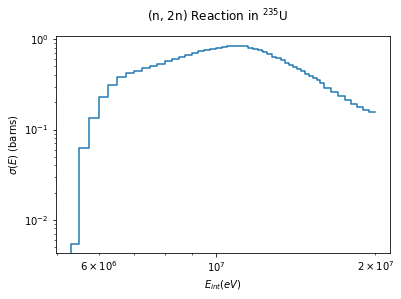

In [5]:
fig = plt.figure()
Eints, sigmas = xs_data['e_int'], xs_data['xs']
plt.step(Eints, sigmas, where = "pre")
plt.suptitle(r'(n, 2n) Reaction in $^{235}$U')
plt.ylabel(r'$\sigma(E)$ (barns)')
plt.xlabel(r'$E_{int} (eV)$')
plt.xscale('log')
plt.yscale('log')
plt.savefig('u235_2n.eps')

In [6]:
if not os.path.isfile("U238-VII.txt"):
    url = "http://t2.lanl.gov/nis/data/data/ENDFB-VII.1-neutron/U/238"
    r = requests.get(url, allow_redirects=True)
    with open("U238-VII.txt", "wb") as outfile:
        outfile.write(r.content)

In [ ]:
u238 = Library("U238-VII.txt")
xs_data = u238.get_xs(922380000, 1)[0]

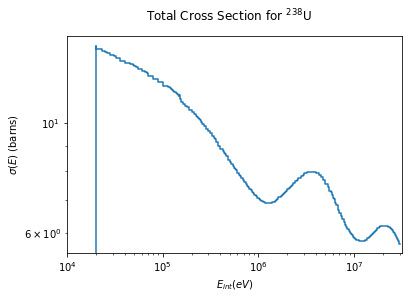

In [8]:
fig = plt.figure()
Eints, sigmas = xs_data['e_int'], xs_data['xs']
plt.step(Eints, sigmas, where = "pre")
plt.suptitle(r'Total Cross Section for $^{238}$U')
plt.ylabel(r'$\sigma(E)$ (barns)')
plt.xlabel(r'$E_{int} (eV)$')
plt.xlim(xmin = 10000)
plt.xscale('log')
plt.yscale('log')

## Evaluation class

The `pyne.endf.Evaluation` class provides a facility for parsing data in an ENDF file. Parsing of all data other than covariances (MF=30+) is supported has been tested against the ENDF/B-VII.1 neutron, photoatomic, electroatomic, atomic relaxation, and photonuclear sublibraries. In this example, we will use the `Evaluation` class to look at typical data in the ENDF/B-VII.1 evaluation of U-235.

In [8]:
u235 = Evaluation("U235-VII.txt")

Reading MF=1, MT=451 Descriptive Data


By default, when an `Evaluation` is instantiated, only the descriptive data in MF=1, MT=451 is parsed. This allows us to get basic information about an evaluation without necessarily reading the whole thing. This useful data can be found in the `info` and `target` attributes.

In [9]:
u235.info

{u'author': ' Young,Chadwick,Talou,Madland,Leal',
 u'date': 'EVAL-SEP06',
 u'date_distribution': 'DIST-DEC06',
 u'date_entry': '        ',
 u'date_release': 'REV-      ',
 u'derived': False,
 u'description': ['***************************************************************** ',
  '                                                                  ',
  '                  ENDF/B-VII EVALUATION                           ',
  '                                                                  ',
  'P.G.Young, M.B.Chadwick, R.E.MacFarlane, W.B.Wilson, D.G.Madland, ',
  '                P.Talou, T. Kawano (LANL)                         ',
  '                          and                                     ',
  '   L. C. Leal, H. Derrien, N. M. Larson, R. Q. Wright (ORNL)      ',
  '                          and                                     ',
  '              D.A. Brown, J.Pruet (LLNL)                          ',
  '                                                                  ',
 

In [10]:
u235.target

{u'ZA': 92235,
 u'excitation_energy': 0.0,
 u'fissionable': True,
 u'isomeric_state': 0,
 u'mass': 233.0248,
 u'stable': False,
 u'state': 0,
 u'temperature': 0.0,
 u'zsymam': ' 92-U -235 '}

To look at cross sections, secondary energy and angle distributions, and resonance data, we need to parse the rest of the data in the file, which can be done through the `Evaluation.read(...)` method.

In [11]:
u235.read()

Reading MF=1, MT=452 Total Neutrons per Fission
Reading MF=1, MT=455 Delayed Neutron Data
Reading MF=1, MT=456 Prompt Neutrons per Fission
Reading MF=1, MT=458 Energy Release Due to Fission
Reading MF=1, MT=460 Delayed Photon Data
Reading MF=2, MT=151 Resonance Parameters
Reading MF=3, MT=1 (z,total)
Reading MF=3, MT=2 (z,elastic)
Reading MF=3, MT=3 (z,nonelastic)
Reading MF=3, MT=4 (z,n)
Reading MF=3, MT=16 (z,2n)
Reading MF=3, MT=17 (z,3n)
Reading MF=3, MT=18 (z,fission)
Reading MF=3, MT=19 (z,f)
Reading MF=3, MT=20 (z,nf)
Reading MF=3, MT=21 (z,2nf)
Reading MF=3, MT=37 (z,4n)
Reading MF=3, MT=38 (z,3nf)
Reading MF=3, MT=51 (z,n1)
Reading MF=3, MT=52 (z,n2)
Reading MF=3, MT=53 (z,n3)
Reading MF=3, MT=54 (z,n4)
Reading MF=3, MT=55 (z,n5)
Reading MF=3, MT=56 (z,n6)
Reading MF=3, MT=57 (z,n7)
Reading MF=3, MT=58 (z,n8)
Reading MF=3, MT=59 (z,n9)
Reading MF=3, MT=60 (z,n10)
Reading MF=3, MT=61 (z,n11)
Reading MF=3, MT=62 (z,n12)
Reading MF=3, MT=63 (z,n13)
Reading MF=3, MT=64 (z,n14)
Rea

Most of the data that is parsed resides in the `reactions` attribute, which is a dictionary that is keyed by the MT value.

In [12]:
elastic = u235.reactions[2]
print('Elastic scattering has the following attributes:')
for attr in elastic.__dict__:
    if elastic.__dict__[attr]:
        print('  ' + attr)

Elastic scattering has the following attributes:
  files
  angular_distribution
  mt
  xs


Now with our reaction we can look at the cross section and any other associated data. The cross section `elastic.xs` is a `Tab1` object whose (x,y) pairs can be accessed from the `x` and `y` attributes. The first ten values of the cross section are:

In [13]:
zip(elastic.xs.x[:10], elastic.xs.y[:10])

[(1.0000000000000001e-05, 0.0),
 (0.0253, 0.0),
 (77.129580000000004, 0.0),
 (2250.0, 0.0),
 (2250.0, 11.204420000000001),
 (2300.0, 12.13951),
 (2500.0, 11.891019999999999),
 (2650.0, 11.528930000000001),
 (2900.0, 11.56729),
 (3000.0, 11.59604)]

Since resonances haven't been reconstructed, everything below the unresolved resonance range at 2250 keV is zero. Above that energy, we can use `elastic.xs` like a function to get a value at a particular energy. For example, to get the elastic cross section at 1 MeV:

In [14]:
elastic.xs(1.0e6)

3.6496849999999998

We can also take a look at the angular distribution for elastic scattering.

In [15]:
esad = elastic.angular_distribution
print(esad)

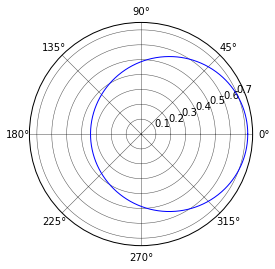

In [16]:
# Elastic scattering angular distribution at 100 keV
E = esad.energy[5]
pdf = esad.probability[5]

theta = np.linspace(0., 2*np.pi, 1000)
mu = np.cos(theta)

plt.subplot(111, polar=True)
plt.plot(theta, pdf(mu))

Ah, but elastic scattering is a simple reaction you say. What if I want information about something more complicated like fission! In the special case of fission, there is the normal reaction data as well as a special attribute on the Evaluation class called `fission`:

In [17]:
print(u235.reactions[18])
print(u235.fission.keys())

<ENDF Reaction: MT=18, (z,fission)>
[u'energy_release', u'yield_independent', u'yield_cumulative', u'nu', u'delayed_photon']


We can look at the neutrons released per fission:

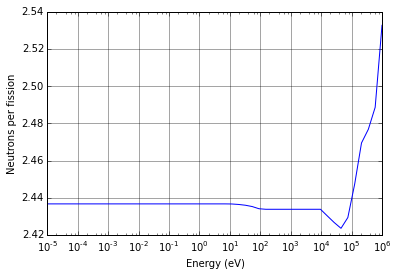

In [18]:
E = np.logspace(-5, 6)
plt.semilogx(E, u235.fission['nu']['total'](E))
plt.xlabel('Energy (eV)')
plt.ylabel('Neutrons per fission')            

The components of energy release from fission are also available to us:

In [19]:
for component, coefficients in u235.fission['energy_release'].items():
    if component != 'order':
        print('{}: {} +/- {} MeV'.format(component, coefficients[0,0], coefficients[1,0]))

fission_products: 169130000.0 +/- 490000.0 MeV
delayed_betas: 6500000.0 +/- 50000.0 MeV
neutrinos: 8750000.0 +/- 70000.0 MeV
total_less_neutrinos: 193483400.0 +/- 150000.0 MeV
prompt_neutrons: 4916000.0 +/- 70000.0 MeV
delayed_neutrons: 7400.0 +/- 1110.0 MeV
total: 202233400.0 +/- 130000.0 MeV
prompt_gammas: 6600000.0 +/- 500000.0 MeV
delayed_gammas: 6330000.0 +/- 50000.0 MeV


To look at the fission energy distribution, we must use the normal reaction data:

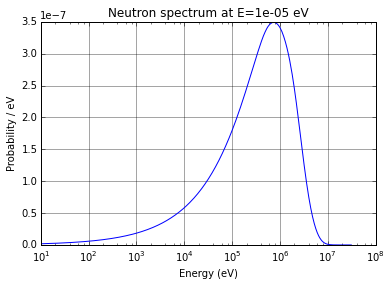

In [20]:
# Get prompt fission neutron spectra
fission = u235.reactions[18]
pfns = fission.energy_distribution[0]

# Plot the distribution for the lowest incoming energy
plt.semilogx(pfns.pdf[0].x, pfns.pdf[0].y)
plt.xlabel('Energy (eV)')
plt.ylabel('Probability / eV')
plt.title('Neutron spectrum at E={} eV'.format(pfns.energy[0]))

Finally, let's take a look at resolved resonance data, which can be found in the `resonances` dictionary.

In [21]:
rrr = u235.resonances['resolved']
print(rrr)

# Show all (l,J) combinations
print(rrr.resonances.keys())

[(0, 3.0), (0, 4.0)]


In [22]:
# Set up headers for table
headers = ['Energy', 'Neutron width', 'Capture width', 'FissionA width', 'FissionB width']

# Get resonance data for l=0, J=3
l = 0
J = 3.0

# Create table data
data = [[r.energy, r.width_neutron, r.width_gamma, r.width_fissionA, r.width_fissionB]
        for r in rrr.resonances[l,J]]

# Render table
HTML(tabulate(data, headers=headers, tablefmt='html'))

Energy,Neutron width,Capture width,FissionA width,FissionB width
-2038.3,0.019703,0.033792,-0.046652,-0.10088
-1812.1,0.0008574,0.037445,0.73617,-0.74187
-1586.2,0.0082845,0.034439,0.15365,-0.099186
-1357.5,0.050787,0.038506,-0.16914,-0.38622
-515.88,2.9884,0.03803,-0.81285,-0.81805
-74.766,0.38375,0.052085,-0.8644,-0.78652
-3.4928,8.539e-08,0.037791,-0.0068844,0.012977
-1.5043,8.5333e-08,0.037828,-0.0070397,0.011686
-0.56098,0.00029974,0.020855,0.095644,-0.011839
0.273793,4.2486e-06,0.046203,0.11771,0.00034848
